## 1- Install and import dependencies

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [13]:
%cd yolov5/

/content/yolov5


In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [ ]:
import torch # torch will be used to load the yolo model and make detections
from matplotlib import pyplot as plt # matplotlib will be used for visualising images
import numpy as np # numpy will be used for array transformation
import cv2 #openCV heps access the webcam and render feeds

## 2- Load Model


In [ ]:
# load the pretrained yolov5 from torch hub 
# check this  : https://pytorch.org/hub/ultralytics_yolov5/
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

In [ ]:
model

## 3- Real Time Detections

In [ ]:
# access the webcam 
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
      break
cap.release()
cv2.destroyAllWindows()

## 5- Train the model


In [17]:
import uuid   # Unique identifier of the image
import os
import time

In [57]:
IMAGES_PATH = os.path.join('data', 'images') # /data/images where we're gonna save our data 
labels = ['drowsy','awake']
number_imgs = 20

In [ ]:
# generate the data using your webcam 
cap = cv2.VideoCapture(0)
# loop through labels
for label in labels:
    print('Collecting images for {}'.format(label)) # printing labels
    time.sleep(5)
    
    # loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # webcam feed
        ret, frame = cap.read()
        
        # naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
# labelImg is an annotation to label images
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!python train.py --img 320 --batch 16 --epochs 300 --data dataset.yml --weights yolov5s.pt --workers 2

## 6- Test the model

In [ ]:
# load the model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp5/weights/last.pt', force_reload=True)

In [97]:
img1 = os.path.join('test','1.jpg')
test1 = model(img1)
test1.print()

image 1/1: 480x640 1 drowsy
Speed: 10.8ms pre-process, 304.9ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


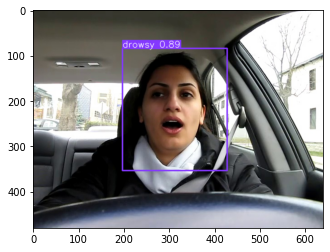

In [98]:
%matplotlib inline 
plt.imshow(np.squeeze(test1.render()))
plt.show()

In [99]:
img2 = os.path.join('test','2.jpg')
test2 = model(img2)
test2.print()

image 1/1: 480x640 1 awake
Speed: 11.0ms pre-process, 334.1ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)


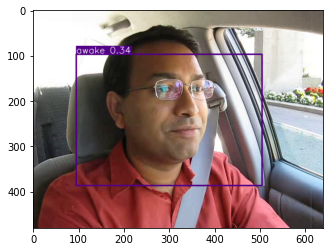

In [100]:
%matplotlib inline 
plt.imshow(np.squeeze(test2.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()